In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
%matplotlib inline

purchase = pd.read_csv ("../input/SupermarketPurchase.csv")

In [ ]:
purchase_copy = purchase.copy()

In [ ]:
purchase.tail()

In [ ]:
#rename data's columns
purchase.rename(columns={'AVG_Actual_price_12':'Avg_MRP','Purchase_Value':'Purchase_amount', 'No_of_Items':'Items_Qty','MONTH_SINCE_LAST_TRANSACTION':'TRANSACTION_MONTH'},inplace=True)

In [ ]:
# we have noticed Total Discount has -ve discount values, which is incorrect because discount cannot be negative. So the -ve sign is removed from the Total Discount

purchase['Total_Discount'] = purchase['Total_Discount'] .astype(str).str.strip('\-')
purchase['Total_Discount']=purchase['Total_Discount'].astype(np.float)

In [ ]:
purchase.isnull().sum(),purchase.shape

In [ ]:
purchase.dtypes

In [ ]:
purchase.describe()

In [ ]:
# unique values 

print("Avg_MRP:",purchase['Avg_MRP'].nunique())
print("Purchase Value:",purchase['Purchase_amount'].nunique())
print("Total_Discount:",purchase['Total_Discount'].nunique())
print("Qty of Items:",purchase['Items_Qty'].nunique())
print("TRANSACTION_MONTH:",purchase['TRANSACTION_MONTH'].nunique())

In [ ]:
pd.DataFrame([{'Avg_MRP': len(purchase['Avg_MRP'].value_counts()),    
               'Purchase_amount': len(purchase['Purchase_amount'].value_counts()),
               'Total_Discount': len(purchase['Total_Discount'].value_counts()),
               'Items_Qty': len(purchase['Items_Qty'].value_counts()),
               'TRANSACTION_MONTH':len(purchase['TRANSACTION_MONTH'].value_counts()),
              }], columns = ['Avg_MRP', 'Purchase_amount', 'Total_Discount','Items_Qty', 'TRANSACTION_MONTH'], index=['Cust_id'])

In [ ]:
# 
duplicate ='Entrées dupliquées:{}'.format(purchase.duplicated().sum())

print(duplicate)

#purchase.drop_duplicates(inplace = True)

In [ ]:
purchase['Purchase_without_discount'] = (purchase['Purchase_amount'] + purchase['Total_Discount'])


In [ ]:
fig = plt.figure(figsize=(25, 7))
PercentPurchase =  np.round((purchase.groupby(["Cust_id"]).Purchase_amount.sum().\
                          sort_values(ascending = False)[:51].sum()/purchase.groupby(["Cust_id"]).\
                          Purchase_amount.sum().sort_values(ascending = False).sum()) * 100, 2)

g = purchase.groupby(["Cust_id"]).Purchase_amount.sum().sort_values(ascending = False)[:51].\
    plot(kind='bar', title='Top Customers: {:3.2f}% Purchase Amount'.format(PercentPurchase))

fig = plt.figure(figsize=(25, 7))

f1 = fig.add_subplot(121)
PercentPurchase1 =  np.round((purchase.groupby(["Cust_id"]).Purchase_amount.sum().\
                          sort_values(ascending = False)[:10].sum()/purchase.groupby(["Cust_id"]).\
                          Purchase_amount.sum().sort_values(ascending = False).sum()) * 100, 2)

g = purchase.groupby(["Cust_id"]).Purchase_amount.sum().sort_values(ascending = False)[:10]\
    .plot(kind='bar', title='Top 10 Customers: {:3.2f}% Purchase Amount'.format(PercentPurchase1))
    
f2 = fig.add_subplot(122)
PercentPurchase2 =  np.round((purchase.groupby(["Cust_id"]).Purchase_amount.count().\
                          sort_values(ascending = False)[:10].sum()/purchase.groupby(["Cust_id"]).\
                          Purchase_amount.count().sort_values(ascending = False).sum()) * 100, 2)

g = purchase.groupby(["Cust_id"]).Purchase_amount.count().sort_values(ascending = False)[:10].\
    plot(kind='bar', title='Top 10 Customers: {:3.2f}% Event Purchase'.format(PercentPurchase2))

In [ ]:
#

plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 12

plt.subplot(1, 2, 1)
sns.countplot(purchase['TRANSACTION_MONTH'], color = 'blue')
plt.title('Nos of Transaction Month')

plt.subplot(1, 2, 2)
sns.lineplot(x=purchase['TRANSACTION_MONTH'], y=purchase['Purchase_amount'])
plt.title('Avg. Last Transaction Month Purchase ')

purchase['TRANSACTION_MONTH'].value_counts()

In [ ]:

plt.rcParams['figure.figsize'] = (25, 15)
plt.rcParams['font.size'] = 12

plt.subplot(2, 2, 1)
sns.distplot(purchase['Purchase_without_discount'],  color = 'orange')
plt.title('Total_Purchase without Discount')

plt.subplot(2, 2, 2)
sns.distplot(purchase['Purchase_amount'],  color = 'red')
plt.title('Purchase after Discount')

plt.subplot(2, 2, 3)
sns.distplot(purchase['Avg_MRP'],  color = 'green')
plt.title('Average Sales Price')

plt.subplot(2, 2, 4)
sns.distplot(purchase['Total_Discount'],  color = 'blue')
plt.title('Total_Discount')


Positively skewed distribution for all variables, which means the variables are below the mean value than expected in the normal distribution. But still the distribution of Avg. MRP is better than others, as the difference between actual and expected mean and not much compare to other variables.  

we try to solve this problem by normalizing the variables . 


In [ ]:
purchase['Purchase_amount']=np.log1p(purchase['Purchase_amount'])
purchase['Purchase_without_discount']=np.log1p(purchase['Purchase_without_discount'])
purchase['Avg_MRP']=np.log1p(purchase['Avg_MRP'])
purchase['Total_Discount']=np.log1p(purchase['Total_Discount'])
purchase['Items_Qty']=np.log1p(purchase['Items_Qty'])

In [ ]:
purchase.head()

In [ ]:

plt.rcParams['figure.figsize'] = (25, 15)
plt.rcParams['font.size'] = 12

plt.subplot(2, 2, 1)
sns.distplot(purchase['Purchase_without_discount'],  color = 'orange')
plt.title('Total_Purchase without Discount')

plt.subplot(2, 2, 2)
sns.distplot(purchase['Purchase_amount'],  color = 'red')
plt.title('Purchase after Discount')

plt.subplot(2, 2, 3)
sns.distplot(purchase['Avg_MRP'],  color = 'green')
plt.title('Avg. Sale Price')

plt.subplot(2, 2, 4)
sns.distplot(purchase['Total_Discount'],  color = 'green')
plt.title('Discount on Total Purchase')


After scaling the variable with log, we can see purchase_amount and Total_Purchase_amount are some where close to normal distribution. As we have small variation in the expected and actual mean. 

Whereas, the Avg_MRP is somewhere close to normaldistribution but we can see the distribution having a left tail, which shows the Avg_MRP is having is slightly higher than the actual mean.
  

In [ ]:
purchase.describe()


In [ ]:
purchase.corr()

In [ ]:
f, ax = plt.subplots(figsize=(12,6))

sns.heatmap(purchase.corr(), square=True, cmap="RdYlGn",linewidth=1,annot=True,fmt='.2f');
plt.show()

Purchase_amount and Total_Purchase_amount are strongly positively correlated to each other.So they tend to move in the same direction. 

# Dimensionality Reduction

Implementing PCA to the data set.
But, before that, time to investigate the explained variance ratio and resulting principal components:

In [ ]:
purchase.drop(['Cust_id','Purchase_without_discount'],axis=1,inplace=True)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca=PCA().fit(purchase)
print('Expalined variance ratio:', pca.explained_variance_ratio_) # we get the ratio dividing the eigen value riance to sum of eigen value
print(purchase.columns.values.tolist())
print()
print('Eigen value:', pca.explained_variance_)   # these are the eigen values 
print()
print(pd.DataFrame(pca.components_, columns= purchase.columns.values.tolist(),index = ['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5']))

In [ ]:
plt.figure(figsize=[10,8])
plt.rcParams['font.size'] = 12
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100)
print(variance_ratio_cum_sum)

plt.plot(variance_ratio_cum_sum, linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=4)
plt.xlabel('Principal component')
plt.ylabel('variance')

The first two principle components explains 93% of the data. The PCA feature is scaled with 0.5 level. So 0,1, 2,3,4 represent the principle component: PC-1, PC-2, PC-3, PC-4, PC-5



In [ ]:
feature_names = ['Avg_MRP', 'Purchase_amount', 'Items_Qty', 'Total_Discount', 'TRANSACTION_MONTH']

plt.figure(figsize=[15,6])
plt.rcParams['font.size'] = 14
sns.heatmap(pca.components_[0:2,:], annot=True, cmap='viridis')
plt.yticks([0,1],["PC1", "PC2"],rotation=360, ha='right')
plt.xticks(range(len(feature_names)), feature_names,rotation= 40, ha='left' )
plt.xlabel('Features')
plt.ylabel('Principal Component')
plt.show()

The PC-1 explained 60% variance in the dataset and PC-2 explained 33% variancein dataset, together they explain 93% variance in dataset. 

The values in features represent the contribution of that individual feature to the principal component. Higher the value, higher will be the contribution of that feature in the principal component.  

Considering PCA to the data with number of components = 2.

The reduced data can be seen on the plotting below.

In [ ]:
plt.figure(figsize=[10,6])
plt.rcParams['font.size'] = 12
pca=PCA(n_components=2)
pca.fit(purchase)
reduced_data=pca.transform(purchase)
inverse_data=pca.inverse_transform(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
reduced_data=pd.DataFrame(reduced_data,columns=['Dim1','Dim2'])
reduced_data[:10]

# Clustering Analysis 

1) K-Means with silhouette_scores:- starting from k=2 to k=15, to collect the silhouette scores for each of the results. Inorder to determine the best number of clusters.

**Silhouette analysis on K-Means clustering** <br>

Silhouette analysis can be used to study the separation distance between the resulting clusters, as a strategy to quantifying the quality of clustering via graphical tool to plot a measure of how tightly grouped the samples in the clusters are. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

It can also be applied to clustering algorithms other than k-means

Silhouette coefficients has a range of [-1, 1], it calculated by:

1. Calculate the cluster cohesion a( i )as the average distance between a sample x( i ) and all other points in the same -cluster.<br>
2. Calculate the cluster separation b( i ) from the next closest cluster as the average distance between the sample x( i ) and all samples in the nearest cluster.<br>
3. Calculate the silhouette s( i ) as the difference between cluster cohesion and separation divided by the greater of the two, as shown here: <br>

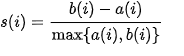


Which can be also written as: 

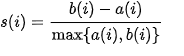

Where:

1. If near +1, it indicate that the sample is far away from the neighboring clusters.<br> 
2. a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.<br>
3. If most objects have a high value, then the clustering configuration is appropriate.<br>
4. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.<br>
5. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters. <br>
6. Negative values indicate that those samples might have been assigned to the wrong cluster.<br>

The silhouette plot can shows a bad K clusters pick for the given data due to the presence of clusters with below average
silhouette scores and also due to wide fluctuations in the size of the silhouette plots. A good k clusters can found when all the plots are more or less of similar thickness and hence are of similar sizes.<br>

Although we have to keep in mind that in several cases and scenarios, sometimes we may have to drop the mathematical explanation given by the algorithm and look at the business relevance of the results obtained.<br>

Let's see below how our data perform for each K clusters groups (2, 4 and 6) in the silhouette score of each cluster, along with the center of each of the cluster discovered in the scatter plots, by amount_log vs recency_log and vs frequency_log.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('BlRd',['blue','red','cyan'])

silhouette_scores=[]
for i in range(2,15):
    cl=KMeans(n_clusters=i,random_state=0)
    result=cl.fit_predict(reduced_data)
    silhouette=silhouette_score(reduced_data,result)
    silhouette_scores.append(silhouette)
    plt.subplot(5,3,i-1)
    plt.scatter(reduced_data.Dim1.values,reduced_data.Dim2.values,c=result,cmap=cmap)
    plt.title(str(i)+' Clusters, Silhouette score :'+ str(silhouette)[:5])
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(20,12)
    plt.tight_layout()
plt.show()

In [ ]:
# Plotting the silhouette scores

plt.figure(figsize=[10,8])
plt.rcParams['font.size'] = 12
plt.plot([i for i in range(2,15)],silhouette_scores)
plt.xlabel('# of clusters')
plt.ylabel('silhouette score')
plt.show()

The best number of clusters seem to be 4 or 2 in this case. So, the corresponding plot is save for the later usage:

In [ ]:
cl=KMeans(n_clusters=2,random_state=0)
result=cl.fit_predict(reduced_data)
silhouette=silhouette_score(reduced_data,result)
plt.scatter(reduced_data.Dim1.values,reduced_data.Dim2.values,c=result,cmap=cmap)
plt.title(str(2)+' Clusters, Silhouette score :'+str(silhouette)[:5])
plt.xlabel('Purchase_amount')
plt.ylabel('TRANSACTION_MONTH')
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,random_state=0)
y_kmeans=kmeans.fit_predict(reduced_data)

reduced_data_X=reduced_data.values
plt.figure(figsize=[15,8])
plt.rcParams['font.size'] = 12
plt.subplot(1, 2, 1)
plt.scatter(reduced_data_X[y_kmeans==0,0],reduced_data_X[y_kmeans==0,1],s=50,c='red',label='X1')
plt.scatter(reduced_data_X[y_kmeans==1,0],reduced_data_X[y_kmeans==1,1],s=50,c='blue',label='X2')
plt.scatter(reduced_data_X[y_kmeans==2,0],reduced_data_X[y_kmeans==2,1],s=50,c='gray',label='X3')
plt.scatter(reduced_data_X[y_kmeans==3,0],reduced_data_X[y_kmeans==3,1],s=50,c='black',label='X4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.title('clusters of #4')
plt.xlabel('Purchase_amount')
plt.ylabel('TRANSACTION_MONTH')
plt.legend()

k_means=KMeans(n_clusters=6,init='k-means++',max_iter=300,random_state=0)
y_k_means=k_means.fit_predict(reduced_data)
plt.subplot(1, 2, 2)
plt.scatter(reduced_data_X[y_k_means==0,0],reduced_data_X[y_k_means==0,1],s=50,c='red',label='X1')
plt.scatter(reduced_data_X[y_k_means==1,0],reduced_data_X[y_k_means==1,1],s=50,c='blue',label='X2')
plt.scatter(reduced_data_X[y_k_means==2,0],reduced_data_X[y_k_means==2,1],s=50,c='gray',label='X3')
plt.scatter(reduced_data_X[y_k_means==3,0],reduced_data_X[y_k_means==3,1],s=50,c='black',label='X4')
plt.scatter(reduced_data_X[y_k_means==4,0],reduced_data_X[y_k_means==4,1],s=50,c='green',label='X5')
plt.scatter(reduced_data_X[y_k_means==5,0],reduced_data_X[y_k_means==5,1],s=50,c='pink',label='X6')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.title('clusters of #6')
plt.xlabel('Purchase_amount')
plt.ylabel('TRANSACTION_MONTH')

plt.legend()
plt.show()

# Visualising the clusters <br>

The cluster with high Purchase_amount and less gap in transaction month are the Target customer.<br>

similarly the cluster with high Purchase_amount and more gap in transaction month can be prospect or impulsive customer making a buying decision in an instant, provided that the conditions are right. <br>

and the cluster with low Purchase_amount and less gap in Transaction month can be Discount customer <br>

and cluster with low purchase and more gap in transaction month can be Wandering customer.   <br>

and cluster with normal or low purchase and more gap in transaction month can be focused Customer.  <br>

and cluster with normal or low purchase and nominal gap in transaction month, the one in the middle is a Standard Customer.




# Model 2 - Elbow method 

Finding optimal number of cluster using Elbow method.


The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.

This method looks at the percentage of variance explained as a function of the number of clusters. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.

**K-Means Clustering** <br>
The K-means clustering belongs to the partition based\centroid based hard clustering family of algorithms, a family of algorithms where each sample in a dataset is assigned to exactly one cluster. <br>

Based on this Euclidean distance metric, we can describe the k-means algorithm as a simple optimization problem, an iterative approach for minimizing the within-cluster sum of squared errors (SSE), which is sometimes also called cluster inertia. So, the objective of K-Means clustering is to minimize total intra-cluster variance, or, the squared error function:<br>

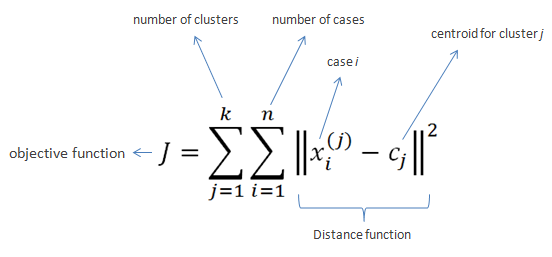
The steps that happen in the K-means algorithm for partitioning the data are as given follows:

The algorithm starts with random point initializations of the required number of centers. The “K” in K-means stands for the number of clusters.<br>
In the next step, each of the data point is assigned to the center closest to it. The distance metric used in K-means clustering is normal Euclidian distance.<br>
Once the data points are assigned, the centers are recalculated by averaging the dimensions of the points belonging to the cluster.<br>
The process is repeated with new centers until we reach a point where the assignments become stable. In this case, the algorithm terminates.<br>

**K-means++** <br>

* While placing the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means. <br>
* To use k-means++ with scikit-learn's KMeans object, we just need to set the init parameter to k-means++ (the default setting) instead of random.

In [ ]:
from sklearn import preprocessing
X_subset = purchase[feature_names] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe().T

In [ ]:
cl = 15
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.grid(True)
plt.show()

# Create a kmeans model with the best K.
print('The best K suggest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(221)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_names[1])
ax.set_ylabel(feature_names[0])

ax = fig.add_subplot(222)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_names[2])
ax.set_ylabel(feature_names[0])


ax = fig.add_subplot(223)
plt.scatter(x = X_scaled[:,3], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_names[3])
ax.set_ylabel(feature_names[0])

ax = fig.add_subplot(224)
plt.scatter(x = X_scaled[:,4], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_names[4])
ax.set_ylabel(feature_names[0])

plt.grid(True)
plt.show()


The best number of clusters (k) is 6 with elbow method. From the scatter plot, we can infer the relation between avg_mrp and other variables for different clusters. 

From the scatter plot, we can infer that Transaction month is independent from Avg. MRP because its neither decreassing nor increasing continously.

A Positive correlation is obeserved between the Avg. MRP and Purchase amount, whereas the initial datapoints reflecting parallel lines for Items_Qty and Total_Discount are neither decreassing nor increasing continously but later a negative relation is observed between Avg. MRP with Items_Qty and Total_Discount. 

# Model 3-  Kmean Clustering done with 6 clusters

In [ ]:

size=model.labels_
size=list(size)
size

In [ ]:
## Size of each cluster 
print(size.count(0))
print(size.count(1))
print(size.count(2))
print(size.count(3))
print(size.count(4))
print(size.count(5))


In [ ]:
purchase['Cluster'] = model.labels_
purchase.head()

In [ ]:
clust_profile = pd.pivot_table(purchase, values= ['Avg_MRP', 'Purchase_amount', 'Items_Qty', 'Total_Discount', 'TRANSACTION_MONTH'],index='Cluster',aggfunc=np.mean)
clust_profile

In [ ]:
cluster_profile_MRP = pd.DataFrame({'labels':purchase['Cluster'],'Items_Qty':purchase['Items_Qty'],'TRANSACTION_MONTH':purchase['TRANSACTION_MONTH'],'Avg_MRP':purchase['Avg_MRP']})
cluster_profile_MRP.sort_values('labels').head()

In [ ]:
kmean = KMeans(n_clusters=6, init='k-means++', random_state=5000)
kmean.fit(purchase[['Items_Qty', 'Avg_MRP']])
fig = plt.figure(figsize=(20,10))
plt.scatter(purchase['Items_Qty'],purchase['Avg_MRP'],50,c=kmean.labels_, alpha = 0.6)
plt.xlabel('Items_Qty')
plt.ylabel('Avg_MRP')
[plt.text( row.Items_Qty,row.Avg_MRP, row.TRANSACTION_MONTH) for row in purchase.itertuples()]

plt.grid(True)
plt.show()

The scatter plot shows the customer purchasing power, across the different cluster keeping in view the Avg_ MRP, Items_ Qty and last transaction month. We can see among all the cluster, the customers in light green cluster are better than other cluster. As we can see that the customer from this cluster having high purchasing power which is reflected in their purchasing pattern through the purchase of high quantity of items with high Avg_ price.

# Model 4- Kmean Clustering done with 4 clusters

In [ ]:
purchase_copy.tail()

In [ ]:
purchase_copy['Total_Discount'] = purchase_copy['Total_Discount'] .astype(str).str.strip('\-')
purchase_copy['Total_Discount']=purchase_copy['Total_Discount'].astype(np.float)

In [ ]:
# scaling the values 

purchase_copy['AVG_Actual_price_12']=np.log1p(purchase_copy['AVG_Actual_price_12'])
purchase_copy['Purchase_Value']=np.log1p(purchase_copy['Purchase_Value'])
purchase_copy['Total_Discount']=np.log1p(purchase_copy['Total_Discount'])
purchase_copy['No_of_Items']=np.log1p(purchase_copy['No_of_Items'])


In [ ]:
purchase_copy.head()

In [ ]:
purchase_copy.isnull().sum(),purchase_copy.shape

In [ ]:
# dropping the No_of items and AVG_Actual_price_12 due to high coorelation value.
feature1= purchase_copy.iloc[:,0:6]
feature1.drop(['Cust_id',],axis=1,inplace=True)
feature1 = pd.pivot_table(purchase_copy, values= ['AVG_Actual_price_12','Purchase_Value','No_of_Items'],index='Total_Discount',aggfunc=np.mean)
#feature1.tail()

In [ ]:
X=feature1.values


In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=[10,8])
plt.rcParams['font.size'] = 12  
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )
plt.grid(True)
plt.show()


In [ ]:
kmeans_1=KMeans(n_clusters=4, n_init=10,max_iter=300, tol=1e-04, random_state=10)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_

In [ ]:
# Visualising the clusters
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1], s = 50, c = 'red', label ='cluster 1' )
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1], s = 50, c = 'blue', label ='cluster 2' )
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1], s = 50, c = 'green', label ='cluster 3' )
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,1], s = 50, c = 'cyan', label = 'cluster 4')

plt.scatter(cluster_center[:,0],cluster_center[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.ylabel('No_of_Items')
plt.xlabel('AVG_Actual_price_12')
plt.legend()
plt.show()

We managed to segment our customer in four different category based on the AVG_Actual_price and No_of_Items purchased.   

From the correlation matrix, we know that the Avg actual price and Nos.of items having a weak negative correlation. So, when we look at the clusters, we can see a negative correlation. As the avg. price of items increases the nos. of items purchased decreases. 

The cluster with high Avg. Actual price and high nos. of Items are the Target group customer (Dark Blue). <br>
similarly the cluster with high avg. Actual price but low nos. of Items are the Careful group (Dark Red). <br>
and the cluster with normal avg. Actual price and high nos. of Items are the Standard group (light Blue). <br>
and cluster with low avg. Actual price and low nos. of Items are the Sensible group (Green).  <br>


By defining the segment of our customer base, we can easily focus on our target customer group for our new promotional offer, instead of focussing on each customer from different segment which will be waste of resource, time and money. 

Based on customer purchasing behavior from each cluster, the different promotional strategy can be offer to the customer from different clusters. Such as premium services, Discount, referral bonus, competition prize money, buy one get one free and cash back offers.  

Thus segmentation ease the problem of uncovering information about a firm's customer base, based on their interactions with the business.


# END